#Capstone Projekt - Wiederverkaufswert von Gebrauchtwagen vorhersagen

## 1) Setup

In [ ]:
# Google-Drive verbinden
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Pfad zu Ordner abspeichern
path = "/content/drive/MyDrive/Big Data + Data Science/Capstone/"

## 2) Libraries importieren

In [ ]:
# Libraries importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3) Daten einlesen

In [ ]:
# Daten importieren
df = pd.read_csv(path + "sample_data_100k.csv")

# Daten inspizieren
df.head()

<ipython-input-201-af1abd3491de>:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "sample_data_100k.csv")


,Unnamed: 0,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,0,SALYK2FV7LA250497,37.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,...,A,8-Speed Automatic Overdrive,t85617,P340 R-Dynamic S AWD,NaN,AWD,All-Wheel Drive,113.1 in,84.4 in,2020
1,1,1C3CCCAB3GN124951,37.6 in,NaN,NaN,NaN,Sedan,NaN,Bronx,23.0,...,A,9-Speed Automatic,t58595,Limited Sedan FWD,NaN,FWD,Front-Wheel Drive,108 in,73.6 in,2016
2,2,ZACNJBC11KPK05419,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,...,A,9-Speed Automatic Overdrive,t83346,Trailhawk 4WD,NaN,4WD,Four-Wheel Drive,101.2 in,79.6 in,2019
3,3,1C4RDJDG2JC150071,38.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bronx,18.0,...,A,8-Speed Automatic,t75321,GT AWD,NaN,AWD,All-Wheel Drive,119.8 in,85.5 in,2018
4,4,2GNALBEK2G6249104,39.9 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bay Shore,NaN,...,A,6-Speed Automatic Overdrive,t58666,LT FWD,NaN,FWD,Front-Wheel Drive,112.5 in,72.5 in,2016


In [ ]:
# Informationen zu den Features erhalten
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100040 entries, 0 to 100039
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               100040 non-null  int64  
 1   vin                      100040 non-null  object 
 2   back_legroom             94722 non-null   object 
 3   bed                      659 non-null     object 
 4   bed_height               14110 non-null   object 
 5   bed_length               14110 non-null   object 
 6   body_type                99607 non-null   object 
 7   cabin                    2058 non-null    object 
 8   city                     100040 non-null  object 
 9   city_fuel_economy        83760 non-null   float64
 10  combine_fuel_economy     0 non-null       float64
 11  daysonmarket             100040 non-null  int64  
 12  dealer_zip               100040 non-null  object 
 13  description              97428 non-null   object 
 14  engi

## 4) Daten für das Modell auswählen (vgl. Dokumentation zu Features)

### Duplikate ausschliessen (falls vorhanden)

In [ ]:
duplicate_rows = df.duplicated()
print("Anzahl der Duplikate:", duplicate_rows.sum())

Anzahl der Duplikate: 0


###Einzelne Variablen anschauen (ergänzend zu explorativer Analyse in Tableau)

### Preis

In [ ]:
# Statistische Zusammenfassung
df['price'].describe()

count    1.000400e+05
mean     2.990942e+04
std      1.982676e+04
min      2.990000e+02
25%      1.841075e+04
50%      2.639000e+04
75%      3.815900e+04
max      1.599500e+06
Name: price, dtype: float64

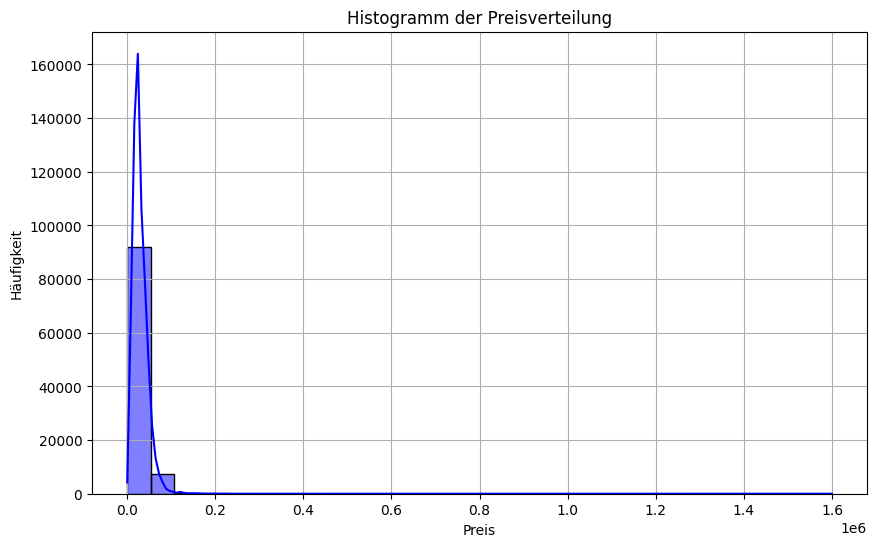

In [ ]:
# Histogramm der Preise
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Histogramm der Preisverteilung')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

In [ ]:
df[["price", "make_name", "model_name"]].sort_values(by='price', ascending=False)

,price,make_name,model_name
70623,1599500.0,Dodge,Grand Caravan
93107,1385900.0,Porsche,918 Spyder
95229,919263.0,Aston Martin,Vanquish
566,859000.0,Mercedes-Benz,SLR McLaren
97901,699900.0,Land Rover,LR3
...,...,...,...
26436,495.0,Suzuki,Aerio
65933,389.0,Dodge,Grand Caravan
65061,300.0,Honda,Accord
65057,300.0,Chrysler,PT Cruiser


In [ ]:
# Outlier entfernen mittels Z-Score
# Feedbacksession
z_scores = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
df_no_outliers = df[z_scores < 3]

In [ ]:
df_no_outliers[["price", "make_name", "model_name"]].sort_values(by='price', ascending=False)

,price,make_name,model_name
13568,89385.0,Lexus,LS
15225,89340.0,Cadillac,Escalade
93849,89335.0,BMW,8 Series
58467,89330.0,Lincoln,Navigator
86995,89260.0,Audi,A7
...,...,...,...
26436,495.0,Suzuki,Aerio
65933,389.0,Dodge,Grand Caravan
65061,300.0,Honda,Accord
65057,300.0,Chrysler,PT Cruiser


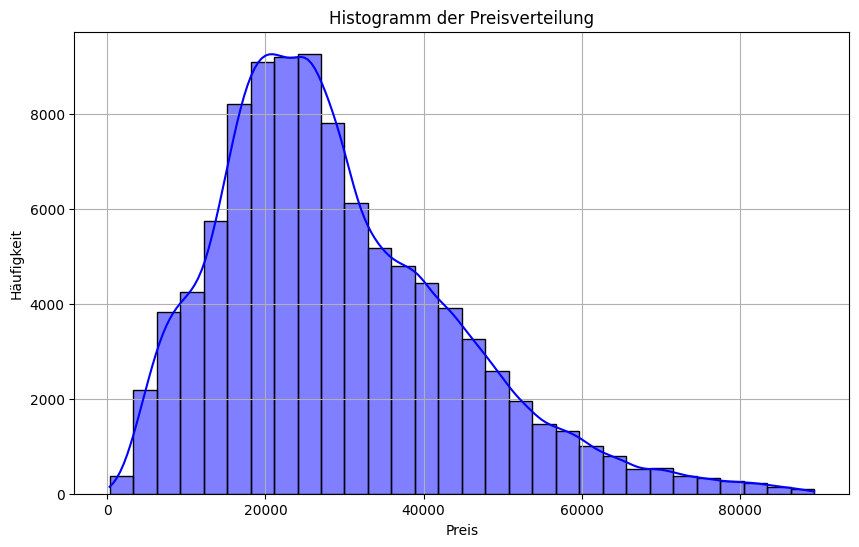

In [ ]:
# Histogramm der Preise
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price'], kde=True, bins=30, color='blue')
plt.title('Histogramm der Preisverteilung')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

### Preis und Mileage kombinieren

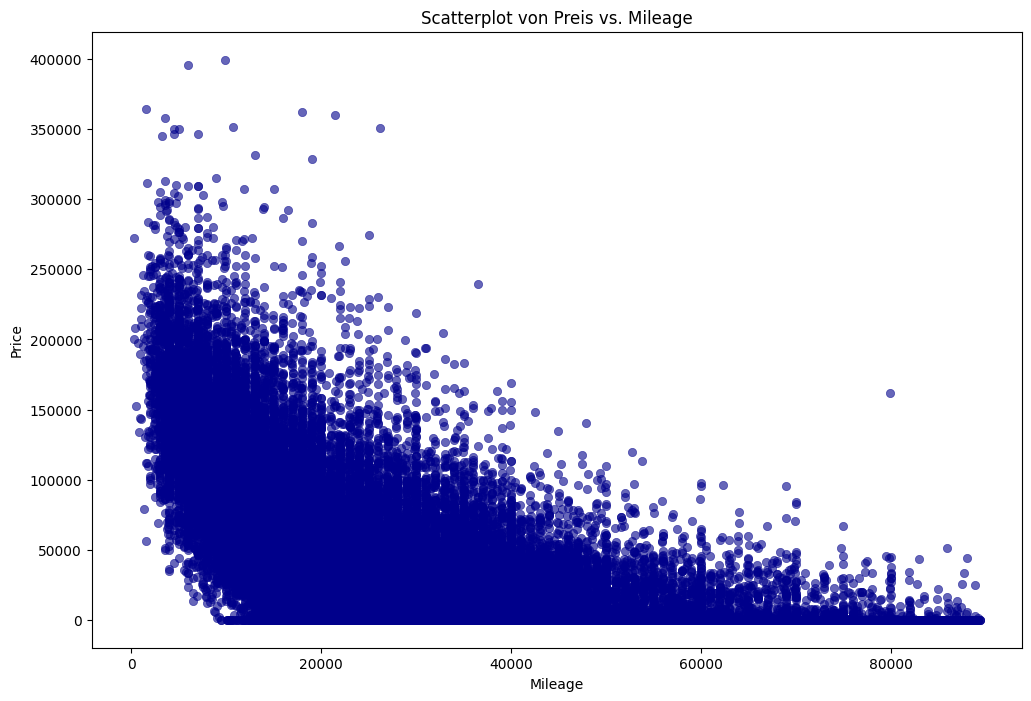

In [ ]:
# Scatterplot erstellen
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='mileage', data=df_no_outliers, alpha=0.6, edgecolor=None, color='darkblue')
plt.title('Scatterplot von Preis vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

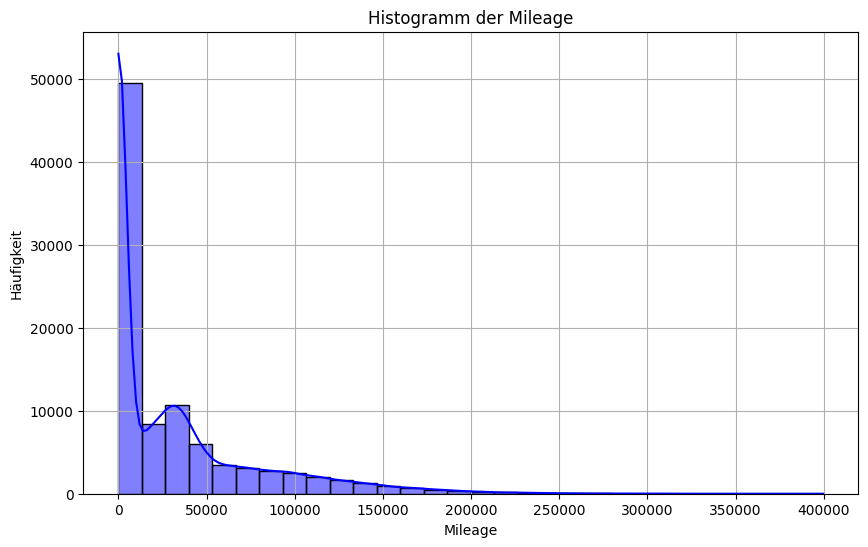

In [ ]:
# Histogramm von Mileage (gefahrene km)
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['mileage'], kde=True, bins=30, color='blue')
plt.title('Histogramm der Mileage')
plt.xlabel('Mileage')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

In [ ]:
df_no_outliers["mileage"].describe()

count     94460.000000
mean      31228.905198
std       45449.678660
min           0.000000
25%           6.000000
50%        8548.000000
75%       43853.000000
max      399578.000000
Name: mileage, dtype: float64

### ERGÄNZEN

In [ ]:
df_no_outliers["combine_fuel_economy"].isnull().sum()

99251

In [ ]:
df_no_outliers["engine_cylinders"].info()
print("\n" + "Anzahl gleicher Werte in Spalten engine_cylinders und engine_type: ")
(df["engine_cylinders"] ==  df["engine_type"]).sum()

<class 'pandas.core.series.Series'>
Index: 99251 entries, 0 to 100039
Series name: engine_cylinders
Non-Null Count  Dtype 
--------------  ----- 
96000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB

Anzahl gleicher Werte in Spalten engine_cylinders und engine_type: 


96726

In [ ]:
print("Nullwerte: " + str(df_no_outliers["frame_damaged"].isnull().sum()))
df_no_outliers["frame_damaged"].value_counts()

Nullwerte: 47087


frame_damaged
False    51654
True       510
Name: count, dtype: int64

In [ ]:
print("Nullwerte: " + str(df_no_outliers["frame_damaged"].isnull().sum()))
df_no_outliers["frame_damaged"].value_counts()

Nullwerte: 47087


frame_damaged
False    51654
True       510
Name: count, dtype: int64

In [ ]:
df_no_outliers["is_new"].value_counts()

is_new
False    50651
True     48600
Name: count, dtype: int64

In [ ]:
df_no_outliers["torque"]

0         332 lb-ft @ 3,500 RPM
1         262 lb-ft @ 4,250 RPM
2         200 lb-ft @ 1,750 RPM
3         260 lb-ft @ 4,000 RPM
4         172 lb-ft @ 4,900 RPM
                  ...          
100035                      NaN
100036    266 lb-ft @ 2,800 RPM
100037    270 lb-ft @ 1,750 RPM
100038    318 lb-ft @ 1,750 RPM
100039    175 lb-ft @ 4,400 RPM
Name: torque, Length: 99251, dtype: object

In [ ]:
df_no_outliers["transmission_display"].unique()

array(['8-Speed Automatic Overdrive', '9-Speed Automatic',
       '9-Speed Automatic Overdrive', '8-Speed Automatic',
       '6-Speed Automatic Overdrive', '6-Speed Automatic', 'Automatic',
       'Continuously Variable Transmission', '6-Speed Manual',
       '7-Speed Automatic', '4-Speed Automatic', nan, '5-Speed Automatic',
       'Manual', '4-Speed Automatic Overdrive',
       '5-Speed Automatic Overdrive', '5-Speed Manual Overdrive',
       '1-Speed Automatic', '7-Speed CVT', '5-Speed Manual',
       '6-Speed Dual Clutch', '7-Speed Dual Clutch',
       '8-Speed Dual Clutch', '7-Speed Automatic Overdrive',
       '1-Speed CVT', '6-Speed CVT', '3-Speed Automatic',
       '6-Speed Manual Overdrive', '4-Speed Manual', '3-Speed Manual',
       '4-Speed CVT', '10-Speed Automatic', '7-Speed Manual',
       '8-Speed CVT', '1-Speed Dual Clutch'], dtype=object)

In [ ]:
df_no_outliers["trim_name"]

0         P340 R-Dynamic S AWD
1            Limited Sedan FWD
2                Trailhawk 4WD
3                       GT AWD
4                       LT FWD
                  ...         
100035             1.5T LT FWD
100036                  LS FWD
100037                      SE
100038         20d Premium AWD
100039           2017.5 SV FWD
Name: trim_name, Length: 99251, dtype: object

In [ ]:
df_no_outliers["trim_name"].value_counts()

trim_name
SE FWD                               2988
S FWD                                1625
XLT SuperCrew 4WD                    1389
LX FWD                               1283
LT FWD                               1260
                                     ... 
2 Dr XL 4WD Extended Cab SB             1
T4 Inscription FWD                      1
Big Horn Crew Cab LB DRW RWD            1
SE 4dr Crew Cab SB with automatic       1
Tradesman Crew Cab                      1
Name: count, Length: 4021, dtype: int64

In [ ]:
df_no_outliers["wheelbase"]

0         113.1 in
1           108 in
2         101.2 in
3         119.8 in
4         112.5 in
            ...   
100035    107.3 in
100036    120.9 in
100037    112.2 in
100038    111.6 in
100039    106.5 in
Name: wheelbase, Length: 99251, dtype: object

### Variablen einschliessen aufgrund Überlegungen zu Relevanz

In [ ]:
df_reduced = df_no_outliers[["body_type", "city_fuel_economy", "engine_type", "fuel_tank_volume", "fuel_type", "highway_fuel_economy", "horsepower",
                "make_name", "mileage", "model_name", "price", "transmission", "wheel_system_display", "year"]]

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99251 entries, 0 to 100039
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             98834 non-null  object 
 1   city_fuel_economy     83172 non-null  float64
 2   engine_type           96000 non-null  object 
 3   fuel_tank_volume      94012 non-null  object 
 4   fuel_type             96583 non-null  object 
 5   highway_fuel_economy  83172 non-null  float64
 6   horsepower            93565 non-null  float64
 7   make_name             99251 non-null  object 
 8   mileage               94460 non-null  float64
 9   model_name            99251 non-null  object 
 10  price                 99251 non-null  float64
 11  transmission          97053 non-null  object 
 12  wheel_system_display  94395 non-null  object 
 13  year                  99251 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 11.4+ MB


In [ ]:
df_reduced.head()

,body_type,city_fuel_economy,engine_type,fuel_tank_volume,fuel_type,highway_fuel_economy,horsepower,make_name,mileage,model_name,price,transmission,wheel_system_display,year
0,SUV / Crossover,NaN,V6,16.6 gal,Gasoline,NaN,340.0,Land Rover,88.0,Range Rover Velar,70742.0,A,All-Wheel Drive,2020
1,Sedan,23.0,I4,15.8 gal,Gasoline,36.0,184.0,Chrysler,25794.0,200,13000.0,A,Front-Wheel Drive,2016
2,SUV / Crossover,NaN,I4,12.7 gal,Gasoline,NaN,177.0,Jeep,20.0,Renegade,31221.0,A,Four-Wheel Drive,2019
3,SUV / Crossover,18.0,V6,24.6 gal,Gasoline,25.0,295.0,Dodge,15732.0,Durango,27300.0,A,All-Wheel Drive,2018
4,SUV / Crossover,NaN,I4,18.8 gal,Gasoline,NaN,182.0,Chevrolet,35363.0,Equinox,13823.0,A,Front-Wheel Drive,2016


## 5) Pre-Processing

### Nullwerte droppen

In [ ]:
df_dropna = df_reduced.dropna()

In [ ]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77481 entries, 1 to 100039
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             77481 non-null  object 
 1   city_fuel_economy     77481 non-null  float64
 2   engine_type           77481 non-null  object 
 3   fuel_tank_volume      77481 non-null  object 
 4   fuel_type             77481 non-null  object 
 5   highway_fuel_economy  77481 non-null  float64
 6   horsepower            77481 non-null  float64
 7   make_name             77481 non-null  object 
 8   mileage               77481 non-null  float64
 9   model_name            77481 non-null  object 
 10  price                 77481 non-null  float64
 11  transmission          77481 non-null  object 
 12  wheel_system_display  77481 non-null  object 
 13  year                  77481 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 8.9+ MB


In [ ]:
# Zeilen entfernen, in denen irgendwo '--' vorkommt
df_dropna = df_dropna[~df_dropna.isin(['--']).any(axis=1)]

In [ ]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77458 entries, 1 to 100039
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             77458 non-null  object 
 1   city_fuel_economy     77458 non-null  float64
 2   engine_type           77458 non-null  object 
 3   fuel_tank_volume      77458 non-null  object 
 4   fuel_type             77458 non-null  object 
 5   highway_fuel_economy  77458 non-null  float64
 6   horsepower            77458 non-null  float64
 7   make_name             77458 non-null  object 
 8   mileage               77458 non-null  float64
 9   model_name            77458 non-null  object 
 10  price                 77458 non-null  float64
 11  transmission          77458 non-null  object 
 12  wheel_system_display  77458 non-null  object 
 13  year                  77458 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 8.9+ MB


### Daten entfernen aufgrund Werte, Masseinheiten entfernen, Kategorien zusammenlegen, usw.

Body_Type

In [ ]:
# Neues Dataframe für nächste Cleaning Schritte
df_clean = df_dropna

In [ ]:
# Body_Type inspizieren
df_clean["body_type"].value_counts()

body_type
SUV / Crossover    38513
Sedan              20786
Pickup Truck        9757
Minivan             2306
Hatchback           2201
Coupe               1670
Wagon               1086
Convertible          581
Van                  558
Name: count, dtype: int64

In [ ]:
# Kategorie "wagon" ausschliessen
df_clean = df_clean[df_clean["body_type"]!="Wagon"]
df_clean["body_type"].value_counts()

body_type
SUV / Crossover    38513
Sedan              20786
Pickup Truck        9757
Minivan             2306
Hatchback           2201
Coupe               1670
Convertible          581
Van                  558
Name: count, dtype: int64

Fuel_Economy

In [ ]:
# Neue Spalte mit durchschnittlichem Verbrauch aus city_fuel_economy und highway_fuel_economy
df_clean["average_fuel_economy"] = (df["city_fuel_economy"] + df["highway_fuel_economy"]) / 2
df_clean = df_clean.drop(["city_fuel_economy", "highway_fuel_economy"], axis = 1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76372 entries, 1 to 100039
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             76372 non-null  object 
 1   engine_type           76372 non-null  object 
 2   fuel_tank_volume      76372 non-null  object 
 3   fuel_type             76372 non-null  object 
 4   horsepower            76372 non-null  float64
 5   make_name             76372 non-null  object 
 6   mileage               76372 non-null  float64
 7   model_name            76372 non-null  object 
 8   price                 76372 non-null  float64
 9   transmission          76372 non-null  object 
 10  wheel_system_display  76372 non-null  object 
 11  year                  76372 non-null  int64  
 12  average_fuel_economy  76372 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 8.2+ MB


<ipython-input-234-58f38f39bea2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["average_fuel_economy"] = (df["city_fuel_economy"] + df["highway_fuel_economy"]) / 2


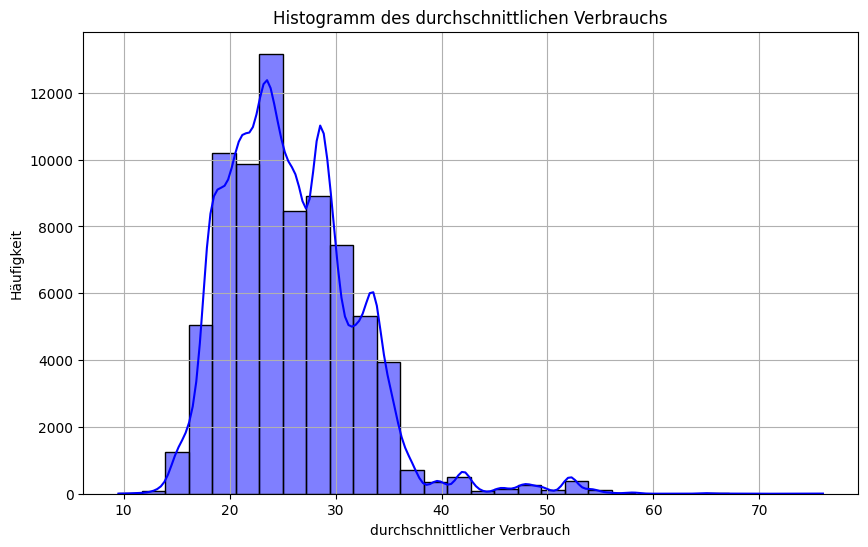

In [ ]:
# Histogramm des durchschnittlichen Verbrauchs
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['average_fuel_economy'], kde=True, bins=30, color='blue')
plt.title('Histogramm des durchschnittlichen Verbrauchs')
plt.xlabel('durchschnittlicher Verbrauch')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

Fuel_Type

In [ ]:
df_clean["fuel_type"].value_counts()

fuel_type
Gasoline                  70266
Flex Fuel Vehicle          3481
Hybrid                     2109
Diesel                      397
Biodiesel                   117
Compressed Natural Gas        2
Name: count, dtype: int64

In [ ]:
# Kategorie "Compressed Natural Gas" ausschliessen
df_clean = df_clean[df_clean["fuel_type"]!="Compressed Natural Gas"]
df_clean["fuel_type"].value_counts()

fuel_type
Gasoline             70266
Flex Fuel Vehicle     3481
Hybrid                2109
Diesel                 397
Biodiesel              117
Name: count, dtype: int64

Engine_Type

In [ ]:
df_clean["engine_type"].value_counts()

engine_type
I4                       39388
V6                       20368
V8                        6402
I4 Hybrid                 2011
V6 Flex Fuel Vehicle      1682
H4                        1666
V8 Flex Fuel Vehicle      1623
I3                        1523
I6                         719
I6 Diesel                  179
I4 Flex Fuel Vehicle       175
I4 Diesel                  143
I5                         136
V6 Biodiesel               117
V6 Hybrid                   88
V6 Diesel                   75
H6                          44
V12                         10
H4 Hybrid                    5
W12                          5
V10                          4
I6 Hybrid                    3
V8 Hybrid                    2
R2                           1
W12 Flex Fuel Vehicle        1
Name: count, dtype: int64

In [ ]:
df_clean["engine_type"] = df_clean["engine_type"].str.replace(' Hybrid', '')
df_clean["engine_type"] = df_clean["engine_type"].str.replace(' Flex Fuel Vehicle', '')
df_clean["engine_type"] = df_clean["engine_type"].str.replace(' Diesel', '')
df_clean["engine_type"] = df_clean["engine_type"].str.replace(' Biodiesel', '')
df_clean["engine_type"].value_counts()

engine_type
I4     41717
V6     22330
V8      8027
H4      1671
I3      1523
I6       901
I5       136
H6        44
V12       10
W12        6
V10        4
R2         1
Name: count, dtype: int64

Fuel_Tank_Volume

In [ ]:
df_clean["fuel_tank_volume"].unique()

array(['15.8 gal', '24.6 gal', '14 gal', '15.9 gal', '22 gal', '18.5 gal',
       '22.5 gal', '13.2 gal', '25.1 gal', '21.7 gal', '17 gal', '18 gal',
       '19 gal', '13.5 gal', '19.4 gal', '14.3 gal', '16.1 gal',
       '21.1 gal', '18.8 gal', '15.3 gal', '23 gal', '17.4 gal',
       '19.8 gal', '17.2 gal', '19.5 gal', '25 gal', '18.1 gal',
       '14.5 gal', '11.9 gal', '19.2 gal', '14.2 gal', '16.4 gal',
       '12.4 gal', '9.5 gal', '15.5 gal', '18.6 gal', '16.2 gal',
       '13.6 gal', '21 gal', '15.6 gal', '16.5 gal', '20.3 gal',
       '14.7 gal', '10.6 gal', '17.5 gal', '26 gal', '12.7 gal', '16 gal',
       '14.8 gal', '20 gal', '17.7 gal', '36 gal', '22.4 gal', '26.4 gal',
       '21.5 gal', '27.3 gal', '14.9 gal', '17.8 gal', '16.9 gal',
       '11 gal', '15.7 gal', '21.8 gal', '13.7 gal', '17.9 gal', '13 gal',
       '23.6 gal', '19.1 gal', '14.4 gal', '11.4 gal', '16.6 gal',
       '33 gal', '11.3 gal', '22.2 gal', '20.6 gal', '16.3 gal',
       '8.9 gal', '12.8 gal', '27

In [ ]:
# Masseinheit mittels str.replace ersetzen
df_clean["fuel_tank_volume"] = df_clean["fuel_tank_volume"].str.replace(' gal', '')
# In Float umwandeln
df_clean["fuel_tank_volume"] = df_clean["fuel_tank_volume"].astype(float)
df_clean["fuel_tank_volume"].info()

<class 'pandas.core.series.Series'>
Index: 76370 entries, 1 to 100039
Series name: fuel_tank_volume
Non-Null Count  Dtype  
--------------  -----  
76370 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


Transmission

In [ ]:
df_clean["transmission"].value_counts()

transmission
A              61663
CVT            13258
M               1194
Dual Clutch      255
Name: count, dtype: int64

In [ ]:
# Umwandeln in eine neue Spalte "Manual": 1=Manuell oder 0=nicht manuell (automatisch)
df_clean["manual"] = df_clean["transmission"].apply(lambda x: 1 if x == "M" else 0)
df_clean[["manual", "transmission"]].loc[df_clean["transmission"]=="A"]

,manual,transmission
1,0,A
3,0,A
7,0,A
8,0,A
11,0,A
...,...,...
100034,0,A
100035,0,A
100036,0,A
100038,0,A


In [ ]:
# Spalte "Transmission" löschen
df_clean = df_clean.drop(["transmission"], axis = 1)

Übersicht nochmals anschauen

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76370 entries, 1 to 100039
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             76370 non-null  object 
 1   engine_type           76370 non-null  object 
 2   fuel_tank_volume      76370 non-null  float64
 3   fuel_type             76370 non-null  object 
 4   horsepower            76370 non-null  float64
 5   make_name             76370 non-null  object 
 6   mileage               76370 non-null  float64
 7   model_name            76370 non-null  object 
 8   price                 76370 non-null  float64
 9   wheel_system_display  76370 non-null  object 
 10  year                  76370 non-null  int64  
 11  average_fuel_economy  76370 non-null  float64
 12  manual                76370 non-null  int64  
dtypes: float64(5), int64(2), object(6)
memory usage: 8.2+ MB


### Dummy-Variablen erstellen

In [ ]:
df_dummies = pd.get_dummies(df_clean, drop_first=True, dtype=float)

In [ ]:
df_dummies.head()

,fuel_tank_volume,horsepower,mileage,price,year,average_fuel_economy,manual,body_type_Coupe,body_type_Hatchback,body_type_Minivan,...,model_name_iA,model_name_iM,model_name_iQ,model_name_tC,model_name_xA,model_name_xD,wheel_system_display_All-Wheel Drive,wheel_system_display_Four-Wheel Drive,wheel_system_display_Front-Wheel Drive,wheel_system_display_Rear-Wheel Drive
1,15.8,184.0,25794.0,13000.0,2016,29.5,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24.6,295.0,15732.0,27300.0,2018,21.5,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,14.0,138.0,4580.0,15724.0,2018,29.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,15.9,180.0,25122.0,21000.0,2018,24.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11,24.6,241.0,61161.0,17300.0,2014,20.5,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76370 entries, 1 to 100039
Columns: 752 entries, fuel_tank_volume to wheel_system_display_Rear-Wheel Drive
dtypes: float64(750), int64(2)
memory usage: 438.7 MB


### Korrelationen anschauen

In [ ]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77458 entries, 1 to 100039
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             77458 non-null  object 
 1   city_fuel_economy     77458 non-null  float64
 2   engine_type           77458 non-null  object 
 3   fuel_tank_volume      77458 non-null  object 
 4   fuel_type             77458 non-null  object 
 5   highway_fuel_economy  77458 non-null  float64
 6   horsepower            77458 non-null  float64
 7   make_name             77458 non-null  object 
 8   mileage               77458 non-null  float64
 9   model_name            77458 non-null  object 
 10  price                 77458 non-null  float64
 11  transmission          77458 non-null  object 
 12  wheel_system_display  77458 non-null  object 
 13  year                  77458 non-null  int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 8.9+ MB


In [ ]:
df_clean[["fuel_tank_volume", "horsepower", "mileage", "price", "year", "average_fuel_economy", "manual"]].corr()

,fuel_tank_volume,horsepower,mileage,price,year,average_fuel_economy,manual
fuel_tank_volume,1.000000,0.789258,0.132778,0.456619,-0.100909,-0.753004,-0.075685
horsepower,0.789258,1.000000,-0.009173,0.622924,0.015190,-0.710656,-0.015547
mileage,0.132778,-0.009173,1.000000,-0.564530,-0.859485,-0.177412,0.076249
price,0.456619,0.622924,-0.564530,1.000000,0.541956,-0.344057,-0.067517
year,-0.100909,0.015190,-0.859485,0.541956,1.000000,0.192529,-0.135215
average_fuel_economy,-0.753004,-0.710656,-0.177412,-0.344057,0.192529,1.000000,-0.003929
manual,-0.075685,-0.015547,0.076249,-0.067517,-0.135215,-0.003929,1.000000


# 6) Daten für Training und Testing erstellen

## X und y definieren

In [ ]:
X = df_dummies.drop(["price", "fuel_tank_volume"], axis=1)
y = df_dummies["price"]

## Training und Testdaten splitten

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

## 7) Modell 1 - Lineare Regression

In [ ]:
# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Modell erstellen und trainieren
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediction
y_pred = lin_reg.predict(X_test)

# Modellevaluierung
# Feedbacksession: Welchen Wert für die Evaluation des Modells (MSE, RMSE oder MAE)?
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE", np.sqrt(mse))
print("R²-Wert:", r2)

MSE: 4824253945333371.0
MAE: 1976629.9423872307
RMSE 69456849.5206439
R²-Wert: -23785250.706478994


## 8) Model 2 - Decision Tree Regressor

In [ ]:
# Imports
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor erstellen
tree_model = DecisionTreeRegressor(random_state=42)

# Modell trainieren
tree_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = tree_model.predict(X_test)

# Modellleistung bewerten
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print ("MAE", mae)
print("R²-Wert:", r2)

MSE: 20063594.333196703
RMSE: 4479.2403745720885
MAE 3091.765374110821
R²-Wert: 0.9010794939985706


## 9) Model 3 - Random Forest Regressor

In [ ]:
# Imports
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor erstellen
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modell trainieren
forest_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = forest_model.predict(X_test)

# Modellleistung bewerten
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²-Wert:", r2)

MSE: 14714300.332853736
RMSE: 3835.9223575111287
R²-Wert: 0.9274533759898353


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

2656.7277467935805

## 10) Modell 4 - Gradient Boosting Regressor

In [ ]:
#Import
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor erstellen
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Modell trainieren
gb_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred = gb_model.predict(X_test)

# Modellleistung bewerten
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mae

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R²-Wert:", r2)

MSE: 23782880.300777674
RMSE: 4876.7694533141175
MAE: 3489.042414636602
R²-Wert: 0.882742119160983


## Hyperparameter-Tuning und CrossValidation

In [ ]:
# Libraries
from sklearn.model_selection import KFold

# Parameterbereich definieren
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Konfiguriere den KFold-Generator für Kreuzvalidierung
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Erstelle das GridSearchCV-Objekt
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# Trainiere das Modell mit Grid-Search
grid_search.fit(X_train, y_train)

In [ ]:
# Libraries
from sklearn.model_selection import GridSearchCV, KFold

# Parameterbereich definieren
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Konfiguriere den KFold-Generator für Kreuzvalidierung
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Erstelle das GridSearchCV-Objekt
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# Trainiere das Modell mit Grid-Search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Konfiguriere den KFold-Generator für Kreuzvalidierung
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Erstelle das GridSearchCV-Objekt
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1)

# Trainiere das Modell mit Grid-Search
grid_search.fit(X_train, y_train)

## 11) Feature Importance

In [ ]:
# Feature Importance oder Koeffizienten extrahieren
dt_importances = tree_model.feature_importances_
lr_coefficients = abs(lin_reg.coef_)  # Absolute Werte der Koeffizienten für lineare Regression
rf_importances = forest_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Features aus den Daten
features = X_train.columns

# DataFrames erstellen für jede Modellart
dt_importance_df = pd.DataFrame({'Feature': features, 'Importance': dt_importances})
lr_importance_df = pd.DataFrame({'Feature': features, 'Coefficient': lr_coefficients})
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': rf_importances})
gb_importance_df = pd.DataFrame({'Feature': features, 'Importance': gb_importances})

# Top 10 Features sortieren
top10_dt = dt_importance_df.sort_values(by='Importance', ascending=False).head(10)
top10_lr = lr_importance_df.sort_values(by='Coefficient', ascending=False).head(10)
top10_rf = rf_importance_df.sort_values(by='Importance', ascending=False).head(10)
top10_gb = gb_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Ergebnisse ausgeben
print("\nTop 10 Features Lineare Regression:")
print(top10_lr)
print("Top 10 Features Decision Tree:")
print(top10_dt)
print("\nTop 10 Features Random Forest:")
print(top10_rf)
print("\nTop 10 Features Gradient Boosting:")
print(top10_gb)



Top 10 Features Lineare Regression:
                         Feature   Coefficient
711                model_name_X7  60481.236848
97           model_name_8 Series  55452.177597
704              model_name_X3 M  52802.512628
706              model_name_X4 M  50609.297659
443  model_name_MDX Hybrid Sport  42453.157624
475               model_name_NSX  41229.648016
76                 model_name_1M  40172.686261
526                model_name_Q8  38354.598625
294           model_name_EuroVan  34320.332938
723               model_name_XT6  33180.427179
Top 10 Features Decision Tree:
                                    Feature  Importance
0                                horsepower    0.425477
1                                   mileage    0.413462
8                 body_type_SUV / Crossover    0.025629
2                      average_fuel_economy    0.020260
747  wheel_system_display_Front-Wheel Drive    0.011010
745    wheel_system_display_All-Wheel Drive    0.008679
56                  mak